4 Steps in WebScraping :

-->Sending a HTTP GET request to the url of the webpage by using requests library

-->Fetching and Parsing the data using BeautifulSoup and maintain the data in some dicts/lists

-->Analyzing the HTML tags and their attributes

-->Output the data in any file format(.csv,.xlsx,.json)

In [13]:
!pip install requests

In [14]:
!pip install bs4

In [15]:
import requests
import bs4
#help(bs4)

In [16]:
from bs4 import BeautifulSoup
#connect to the url
url = "https://www.makaan.com/vijayawada-residential-property/buy-property-in-vijayawada-city"
data = requests.get(url)
data
##gaie error shows network issue.

<Response [200]>

In [17]:
#This is where BeautifulSoup comes into action by getting the data
soup = BeautifulSoup(data.content,'html')
soup

<!DOCTYPE html>
 <html lang="en"><head><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><title>Property for Sale in Vijayawada | 1057+ Vijayawada Properties for sale</title><meta content="Search 1057+ Properties for sale in Vijayawada on Makaan.com. Find ✓274+ New Projects for sale. ✓225+ Flats/Apartments. ✓82+ Houses/Villas. Visit Now !" name="description"/><meta content="Buy Vijayawada Properties, Residential Property for sale in Vijayawada, Property for sale in Vijayawada, Vijayawada Property Sale" name="keywords"/><meta content="#fff" id="themeColor" name="theme-color"/><meta content="origin" name="referrer"/><meta content="55ce01b3ca93c05fd5a41439a23dd0d9" name="p:domain_verify"/><meta content="155462194517712" name="fb:pages"/><meta content="India" name="country"/><meta content="website" name="og:type"/><meta content="Makaan.com" name="og:site_name"/><meta content="http://static.makaan.com/6/61/355/vijayawada-heroshot-2970826.jpeg" name="og:image:url"/><meta co

In [ ]:
print(soup.prettify())

In [ ]:
#extracting Property name
soup.find('div',attrs={'class':'title-line'}).text


In [ ]:
soup.find('a',attrs={'class':'typelink'}).span.text.strip() #removes spaces from front or from back of a sentence or a word.

In [ ]:
soup.find('span',attrs={'itemprop':'addressLocality'}).text

In [ ]:
#find the area and total price
soup.find('div',attrs={'data-type':'price-link'}).text.strip()

In [ ]:
soup.find('td',attrs={'class':'size'}).text.strip()

In [ ]:
soup.find('td',attrs={'class':'val'}).text

In [ ]:
soup.find('ul',attrs={'class':'listing-details'}).text

In [ ]:
#now we will extract details from the entire first page
#find_all()
#soup.find_all('div',attrs={'class':'title-line'}).text


In [18]:
#as find_all() to be used for multiple entries we go for iterations
a = soup.find_all('div',attrs={'class':'title-line'})
names = [] #this list will have property names
for i in a:
    #print(i.text)
    names.append(i.text)

print(len(names))
names

20


['Residential Plot in Himaja Elite Vistas',
 'Residential Plot in Himaja Elite Vistas',
 '2 BHK Apartment in Himaja Sri Hemadurga Jewel County',
 '3 BHK Apartment',
 'Residential Plot',
 '2 BHK Apartment',
 '2 BHK Independent House',
 '2 BHK Apartment in Hycon Elite',
 '3 BHK Apartment',
 '3 BHK Independent Floor',
 '3 BHK Apartment',
 '2 BHK Apartment',
 '2 BHK Independent House',
 '3 BHK Independent Floor',
 '6 BHK Independent House',
 'Residential Plot in Harivillu Fortune Legendary',
 'Residential Plot',
 'Residential Plot',
 '3 BHK Apartment in Pooja Tree Storey',
 '3 BHK Apartment in Sri Naga Sun Rise Enclave']

In [ ]:
b = soup.find_all('span',attrs={'itemprop':'addressLocality'})
#optimized way -->List Comprehension
#syntax is --> [exprsn for var in collection/function]
places = [i.text for i in b]
print(places)
print(len(places))

In [ ]:
#extracting price
c = soup.find_all('div',attrs={'data-type':'price-link'})
d = [i.text.strip() for i in c]
print(d)
print(len(d))

In [ ]:
#Now we need to remove 'L' and 'Cr' from the above price
#As prices are in Lakhs and Crores we start removing them
Price = []
for i in c:
    i = i.text.strip()
    if "Cr" in i:
        i = i.replace(" Cr",'') #replacing with empty string
        i = float(i) * 100 #converting into lakhs
    else:
        i = i.replace(" L","")
        i = float(i)
    Price.append(i)
print(Price)
print(len(Price))

In [ ]:
d = soup.find_all('td',attrs={'class':'size'})
area = [i.text.strip() for i in d]
print(area)
print(len(area))

In [ ]:
#Getting the house type along with information about bathrooms/facing
property_types = ['Apartment','Builder Floor','Villa',
                  'Residential Plot','Independent House',
                  'Independent Floor','Studio Apartment']
f = soup.find_all('div',attrs={'class':'title-line'})
Type = []

for i in f:
    i = i.text
    for p_type in property_types:
        if p_type in i:
            Type.append(p_type)
print(Type)
print(len(Type))

In [ ]:
#Now for the number of BHK we will replace Residential plot with '0'
f = soup.find_all('div',attrs={'class':'title-line'})
Rooms = []
for i in f:
    i = i.span.text
    #print(i)
    i = i.replace("Residential Plot",'0').replace(' ','')
    Rooms.append(i)
print(Rooms)
print(len(Rooms))

In [ ]:
#checking status type
s = soup.find_all('td',attrs={'class':'val'})
status = [i.text for i in s]
print(status)
print(len(status))

In [ ]:
#details of the property
d = soup.find_all('ul',attrs={'class':'listing-details'})
details = [i.text for i in d]
print(details)
print(len(details))

In [19]:
#So we finally separate Bathrooms and Type of Facing listings
#Regular Expressions -->re
import re #pattern matching
d = soup.find_all('ul',attrs={'class':'listing-details'})
Bathrooms = []
Facing = []
for i in d:
    i = i.text
    bathroom_count = re.findall(r'(\d+) Bathrooms',i)#\d -->digits
    if bathroom_count:
        Bathrooms.append(int(bathroom_count[0]))
    else:
        Bathrooms.append(0)
    facing_direction = re.findall(r'(North|South|East|West|NorthEast|NorthWest|SouthEast|SouthWest) facing',i)
    if facing_direction:
        Facing.append(facing_direction[0])
    else:
        Facing.append('None')
print(Facing)
print(Bathrooms)

['None', 'None', 'None', 'West', 'East', 'None', 'NorthEast', 'None', 'East', 'None', 'None', 'None', 'East', 'West', 'None', 'None', 'West', 'None', 'East', 'None']
[0, 0, 2, 3, 0, 2, 2, 2, 3, 3, 3, 2, 2, 3, 7, 0, 0, 0, 3, 3]


In [ ]:
#now we will use the same above logic to extract for the entire page
#ipython -->Interactive Python
#!pip install ipython

In [20]:
base_url = "https://www.makaan.com/vijayawada-residential-property/buy-property-in-vijayawada-city?page="
for i in range(1,41):
    url = base_url+str(i)
    print(url)

https://www.makaan.com/vijayawada-residential-property/buy-property-in-vijayawada-city?page=1
https://www.makaan.com/vijayawada-residential-property/buy-property-in-vijayawada-city?page=2
https://www.makaan.com/vijayawada-residential-property/buy-property-in-vijayawada-city?page=3
https://www.makaan.com/vijayawada-residential-property/buy-property-in-vijayawada-city?page=4
https://www.makaan.com/vijayawada-residential-property/buy-property-in-vijayawada-city?page=5
https://www.makaan.com/vijayawada-residential-property/buy-property-in-vijayawada-city?page=6
https://www.makaan.com/vijayawada-residential-property/buy-property-in-vijayawada-city?page=7
https://www.makaan.com/vijayawada-residential-property/buy-property-in-vijayawada-city?page=8
https://www.makaan.com/vijayawada-residential-property/buy-property-in-vijayawada-city?page=9
https://www.makaan.com/vijayawada-residential-property/buy-property-in-vijayawada-city?page=10
https://www.makaan.com/vijayawada-residential-property/buy-

In [21]:
#pip install ipython
from IPython.display import clear_output
import time #allows to access page without any blocking. (ex: captcha).

## Scraping from multiple pages from the website

In [22]:
Bedrooms = [];Bathrooms = []
Location = [];Price = []
Size = [];Status = []
Facing = [];Type = []

property_types = ['Apartment', 'Independent House',
                  'Independent Floor',
                  'Villa', 'Studio Apartment',
                  'Residential Plot', 'Builder Floor']

for i in range(1, 54):
  url = f'https://www.makaan.com/vijayawada-residential-property/buy-property-in-vijayawada-city?propertyType=apartment,builder-floor,villa,residential-plot,independent-house,studio-apartment&page={i}'
  print(f'Scraping Info from Page --> {i}')
  clear_output(wait=True) #clears every page 
  time.sleep(3) #waiting time to move from one page to other

  d = requests.get(url)
  soup = BeautifulSoup(d.content, 'html')

  a = soup.find_all('a', attrs={'class':'typelink'})
  for i in a:
    i = i.span.text #you need only number which is present in start
    i = i.replace('Residential Plot', '0').replace(' ', '')
    Bedrooms.append(i)

  b = soup.find_all('span', attrs={'itemprop':'addressLocality'})
  for i in b:
    Location.append(i.text)

  c = soup.find_all('div', attrs={'data-type':'price-link'})
  for i in c:
    i = i.text.strip()
    if 'Cr' in i:
      i = i.replace(' Cr', '')
      i = float(i) * 100 #converting into Lakhs
    else:
      i = i.replace(' L', '')
      i = float(i)
    Price.append(i)

  #Extracting Area
  d = soup.find_all('td', attrs={'class':'size'})
  for i in d:
    i = i.text.strip()
    Size.append(i)

  #Extracting construction status
  e = soup.find_all('td', attrs={'class':'val'})
  for i in e:
    i = i.text
    Status.append(i)

  #Extracting Bathrooms and Facing Type
  f = soup.find_all('ul', attrs={'class':'listing-details'})
  for i in f:
    i = i.text
    bathroom_count = re.findall(r'(\d+) Bathrooms', i)
    if bathroom_count:
      Bathrooms.append(int(bathroom_count[0]))
    else:
      Bathrooms.append('0')
    facing_direction = re.findall(r'(North|South|East|West|NorthEast|NorthWest|SouthEast|SouthWest) facing', i)
    if facing_direction:
      Facing.append(facing_direction[0])
    else:
      Facing.append('None')

  g = soup.find_all('div', attrs={'class':'title-line'})
  for i in g:
    i = i.text
    for p_type in property_types:
      if p_type in i:
        Type.append(p_type)

Scraping Info from Page --> 53


In [24]:
print(len(Bathrooms))
print(len(Bedrooms))
print(len(Status))
print(len(Size))
print(len(Location))
print(len(Price))
print(len(Facing))
print(len(Type))

1057
1057
1057
1057
1057
1057
1057
1070


In [25]:
#let's create a dataframe from above data
data_dict = {'Bedrooms':Bedrooms,
            'Bathrooms':Bathrooms,
            'Status':Status,
            'Size':Size,
            'Location':Location,
            'Price':Price,
            'Facing':Facing,
            'Type':Type}
#data_dict

In [26]:
#Now as we have different values in all columns we write a logic
#to create a dataframe keeping max_length as 1070 in above case
import pandas as pd
max_length = 1070 #dependng on your data scraped above

for key in data_dict.keys():
    data_dict[key] += [None] * (max_length - len(data_dict[key])) #data should in consisted manner. so we use it.

data = pd.DataFrame(data_dict)
data
#data.isnull().sum()

,Bedrooms,Bathrooms,Status,Size,Location,Price,Facing,Type
0,0,0,New,7200,Kesarapalli,252.00,None,Residential Plot
1,0,0,New,1944,Kesarapalli,68.04,None,Residential Plot
2,2,2,Ready to move,1266,Gannavaram,45.57,None,Apartment
3,3,3,Ready to move,1587,Poranki,55.50,West,Apartment
4,0,0,Resale,1560,Kankipadu,15.50,East,Residential Plot
...,...,...,...,...,...,...,...,...
1065,None,None,None,None,None,NaN,None,Residential Plot
1066,None,None,None,None,None,NaN,None,Residential Plot
1067,None,None,None,None,None,NaN,None,Residential Plot
1068,None,None,None,None,None,NaN,None,Residential Plot


In [27]:
data.isnull().sum()

Bedrooms     13
Bathrooms    13
Status       13
Size         13
Location     13
Price        13
Facing       13
Type          0
dtype: int64

In [ ]:
#we have created missing values in all other columns so we drop those values
data.dropna(inplace=True) #permenant drop we use true and for temporary drop we use false.

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   1070 non-null   int32  
 1   Bathrooms  1057 non-null   object 
 2   Status     1070 non-null   int64  
 3   Size       1057 non-null   object 
 4   Location   1070 non-null   int64  
 5   Price      1057 non-null   float64
 6   Facing     1070 non-null   int64  
 7   Type       1070 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 62.8+ KB


In [29]:
#once we get the final data we perform descriptive statistical information and then check for
#outliers
type(data)
data.describe()
#data.describe(include="all")
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Bedrooms,1057,7,0,734,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bathrooms,1057,16,0,742,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,1057,4,New,694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,1057,282,1080,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,1057,89,Edupugallu,317,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,1057.0,NaN,NaN,NaN,50.405781,57.209044,1.95,25.61,35.64,54.0,570.0
Facing,1057,9,None,435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,1070,6,Residential Plot,734,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#before getting into removal of outliers let's have a
#complete overview of all columns using plotly
import plotly.express as px
data.columns

Index(['Bedrooms', 'Bathrooms', 'Status', 'Size', 'Location', 'Price',
       'Facing', 'Type'],
      dtype='object')

In [ ]:
#px.box(data) #As every column is having different type of data
#we need to convert those categorical values to numerical values

In [30]:
data['Status'].unique()

array(['New', 'Ready to move', 'Resale', 'Under Construction', None],
      dtype=object)

In [32]:
#data['Location'].unique()
data['Location'].nunique()

89

In [ ]:
data['Facing'].unique()

In [ ]:
data['Type'].unique()

In [51]:
#we use sklearn for feature encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder() #used to convert characteral values  to numerical values


In [50]:
data['Location'] = label.fit_transform(data['Location'])

In [35]:
names = ['Saketh','Codegnan','Obaid','Kesava']
marks = [85,100,65,75]
d = dict(zip(names,marks))
d =pd.DataFrame(d,index=[1,2,3,4])
d

,Saketh,Codegnan,Obaid,Kesava
1,85,100,65,75
2,85,100,65,75
3,85,100,65,75
4,85,100,65,75


In [ ]:
#data['Location']

In [63]:
data['Status'] = label.fit_transform(data['Status']) #by using label encoder we convert object (categorical value to numerical value)
encoded_to_original = dict(zip(label.transform(label.classes_),
                               label.classes_))

for encoded_label, original_value in encoded_to_original.items():
  print(f'{encoded_label} - {original_value}')

0 - 0
1 - 1
2 - 2
3 - 3
4 - 4


In [62]:
# for col in data.columns:
#     if data [col].dtype =='object':
        
    
#         data[col] = label.fit_transform(data[col])
#         encoded_to_original = dict(zip(label.transform(label.classes_),
#                                label.classes_))
#         print(col,'={')
#         for encoded_label, original_value in encoded_to_original.items():
#           print(f'"{original value}" : {encoded_label}',end=',')
#         print('}')
#         print('----------------------')


SyntaxError: f-string: invalid syntax. Perhaps you forgot a comma? (1117712989.py, line 10)

In [65]:
data['Location'] = label.fit_transform(data['Location'])
encoded_to_original = dict(zip(label.transform(label.classes_),
                               label.classes_))

for encoded_label, original_value in encoded_to_original.items():
  print(f'{encoded_label} - {original_value}')

0 - 0
1 - 1
2 - 2
3 - 3
4 - 4
5 - 5
6 - 6
7 - 7
8 - 8
9 - 9
10 - 10
11 - 11
12 - 12
13 - 13
14 - 14
15 - 15
16 - 16
17 - 17
18 - 18
19 - 19
20 - 20
21 - 21
22 - 22
23 - 23
24 - 24
25 - 25
26 - 26
27 - 27
28 - 28
29 - 29
30 - 30
31 - 31
32 - 32
33 - 33
34 - 34
35 - 35
36 - 36
37 - 37
38 - 38
39 - 39
40 - 40
41 - 41
42 - 42
43 - 43
44 - 44
45 - 45
46 - 46
47 - 47
48 - 48
49 - 49
50 - 50
51 - 51
52 - 52
53 - 53
54 - 54
55 - 55
56 - 56
57 - 57
58 - 58
59 - 59
60 - 60
61 - 61
62 - 62
63 - 63
64 - 64
65 - 65
66 - 66
67 - 67
68 - 68
69 - 69
70 - 70
71 - 71
72 - 72
73 - 73
74 - 74
75 - 75
76 - 76
77 - 77
78 - 78
79 - 79
80 - 80
81 - 81
82 - 82
83 - 83
84 - 84
85 - 85
86 - 86
87 - 87
88 - 88
89 - 89


In [66]:
data['Facing'] = label.fit_transform(data['Facing'])
encoded_to_original = dict(zip(label.transform(label.classes_),
                               label.classes_))

for encoded_label, original_value in encoded_to_original.items():
  print(f'{encoded_label} - {original_value}')

0 - 0
1 - 1
2 - 2
3 - 3
4 - 4
5 - 5
6 - 6
7 - 7
8 - 8
9 - 9


In [67]:
data['Type'] = label.fit_transform(data['Type'])
encoded_to_original = dict(zip(label.transform(label.classes_),
                               label.classes_))

for encoded_label, original_value in encoded_to_original.items():
  print(f'{encoded_label} - {original_value}')

0 - 0
1 - 1
2 - 2
3 - 3
4 - 4
5 - 5


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   1070 non-null   int32  
 1   Bathrooms  1057 non-null   object 
 2   Status     1070 non-null   int64  
 3   Size       1057 non-null   object 
 4   Location   1070 non-null   int64  
 5   Price      1057 non-null   float64
 6   Facing     1070 non-null   int64  
 7   Type       1070 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 62.8+ KB


In [79]:
#Converting object dtype into int dtype
data['Bathrooms'] = data['Bathrooms'].astype('int64')
data['Bedrooms'] = data['Bedrooms'].astype('int64')
data['Size'] = data['Size'].astype('int64')

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [78]:
px.box(data)

ValueError: Plotly Express cannot process wide-form data with columns of different type.

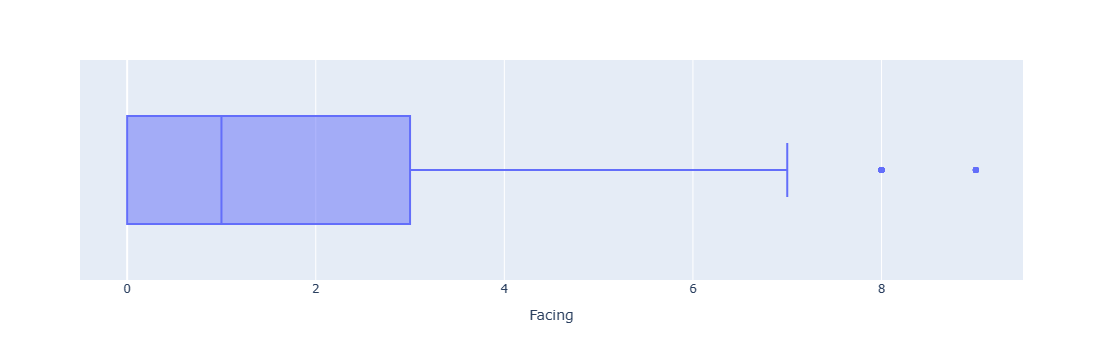

In [76]:
#data.info()
px.box(data,x='Facing')

#


In [81]:
#Removing Outliers from the dataframe -->we will create a final dataframe
def remove_outliers(df, threshold=3):
    df_cleaned = df.copy() #copy of dataframe
    #The threshold value determines how far from the first and third quartiles a data point must be to be considered an outlier
    for col in df_cleaned.select_dtypes(include=['int64',
                                               'float64']).columns:
        Q1 = df_cleaned[col].quantile(0.25) #25th percentile
        Q3 = df_cleaned[col].quantile(0.75) #75th percentile
        IQR = Q3 - Q1 #InterQuantile Range
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        #Filter the DataFrame to keep only the rows where the
        #column values are within the calculated bounds,
        #effectively removing outliers
        df_cleaned = df_cleaned[
            (df_cleaned[col] >= lower_bound) &
            (df_cleaned[col] <= upper_bound)
        ]
    return df_cleaned

In [84]:
def remove_outliers_percentage_check(df, threshold=3):
    df_cleaned = df.copy()

    total_outliers = 0  # Initialize a variable to count total outliers.

    for col in df_cleaned.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)

        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)

        total_outliers += outliers.sum()  # Count outliers in the current column.

        df_cleaned = df_cleaned[~outliers]

    percentage_outliers = (total_outliers / df.shape[0]) * 100  # Calculate the percentage of outliers.

    return df_cleaned, percentage_outliers


In [86]:
df = remove_outliers(data)
df

,Bedrooms,Bathrooms,Status,Size,Location,Price,Facing,Type
1,0,0,0,1944,34,68.04,1,3
2,2,2,1,1266,17,45.57,1,0
3,3,3,1,1587,56,55.50,8,0
4,0,0,2,1560,31,15.50,0,3
5,2,2,1,1450,56,48.00,1,0
...,...,...,...,...,...,...,...,...
1052,0,0,2,2040,4,85.80,8,3
1053,0,0,2,2040,4,85.80,8,3
1054,0,0,2,2040,4,85.80,8,3
1055,0,0,2,2040,4,85.80,8,3


In [93]:
#We will create a csv file from the above data
#df.info()
df.to_csv("House.csv",index = False) #to convert into datasets we use to_csv
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 989 entries, 1 to 1056
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   989 non-null    int32  
 1   Bathrooms  989 non-null    object 
 2   Status     989 non-null    int64  
 3   Size       989 non-null    object 
 4   Location   989 non-null    int64  
 5   Price      989 non-null    float64
 6   Facing     989 non-null    int64  
 7   Type       989 non-null    int64  
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 65.7+ KB


In [ ]:
df['Bathrooms'] = df['Bathrooms'].astype('int64')

In [ ]:
df.info()

In [ ]:
data = pd.read_csv('House.csv')
#data
data.columns

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bedrooms   1070 non-null   int32  
 1   Bathrooms  1057 non-null   object 
 2   Status     1070 non-null   int64  
 3   Size       1057 non-null   object 
 4   Location   1070 non-null   int64  
 5   Price      1057 non-null   float64
 6   Facing     1070 non-null   int64  
 7   Type       1070 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(2)
memory usage: 62.8+ KB


In [95]:
import pandas as pd
import numpy as np


In [101]:
df=pd.read_csv('House.csv')
df.tail(100)

,Bedrooms,Bathrooms,Status,Size,Location,Price,Facing,Type
889,4,4,1,1152,45,79.50,0,3
890,2,20232,3,1152,45,55.00,1,3
891,2,2,1,1215,26,36.45,1,3
892,2,2,1,1170,45,55.00,1,3
893,3,3,1,1625,26,48.75,1,3
...,...,...,...,...,...,...,...,...
984,0,0,2,2040,4,85.80,8,3
985,0,0,2,2040,4,85.80,8,3
986,0,0,2,2040,4,85.80,8,3
987,0,0,2,2040,4,85.80,8,3


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [106]:
a,b= np.arange(10).reshape(5,2),range(5)
a,b

(array([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]]),
 range(0, 5))

In [111]:
w,p,q,r = train_test_split(a,b)
w,p,q,r

(array([[8, 9],
        [4, 5],
        [0, 1]]),
 array([[6, 7],
        [2, 3]]),
 [4, 2, 0],
 [3, 1])

In [112]:
df['Bathrooms'] =df['Bathrooms'].astype('int64')

In [117]:
x=df.drop(columns= ['Price']) #independent
y=df['Price'] #dependent

In [122]:
x,y

(     Bedrooms  Bathrooms  Status  Size  Location  Facing  Type
 0           0          0       0  1944        34       1     3
 1           2          2       1  1266        17       1     0
 2           3          3       1  1587        56       8     0
 3           0          0       2  1560        31       0     3
 4           2          2       1  1450        56       1     0
 ..        ...        ...     ...   ...       ...     ...   ...
 984         0          0       2  2040         4       8     3
 985         0          0       2  2040         4       8     3
 986         0          0       2  2040         4       8     3
 987         0          0       2  2040         4       8     3
 988         0          0       0  2394        80       0     3
 
 [989 rows x 7 columns],
 0      68.04
 1      45.57
 2      55.50
 3      15.50
 4      48.00
        ...  
 984    85.80
 985    85.80
 986    85.80
 987    85.80
 988    19.95
 Name: Price, Length: 989, dtype: float64)

In [126]:
x_train,x_test,y_train,y_test =train_test_split(x,y,
                                                test_size=0.3,
                                                random_state=42)

In [127]:
len(x_train),len(x_test)

(692, 297)

In [128]:
lin_reg =LinearRegression()

In [137]:
lin_reg.fit(x_train,y_train)
#model created and trained

LinearRegression()

In [138]:
y_preds = lin_reg.predict(x_test)

In [139]:
y_preds

array([19.26329235, 67.76947622, 30.10688867, 57.60353778, 36.11143042,
       29.15213214, 65.84095869, 27.82942643, 33.47037847, 37.8682774 ,
       67.840747  , 30.13594505, 48.83452244, 28.30972183, 35.27940006,
       30.56192527, 33.25732949, 65.70654504, 52.90103094, 37.8451484 ,
       64.84831898, 29.72202642, 19.93870008, 30.81246946, 37.8682774 ,
       38.96611954, 36.13639727, 46.20171621, 76.37238822, 30.20533206,
       31.71048138, 32.8368288 , 27.03244631, 46.20171621, 19.41627058,
       36.04401423, 49.80899134, 55.49774368, 28.95230192, 31.77462509,
       36.98239356, 29.31704509, 52.27796945, 26.42245795, 54.40485591,
       48.80184476, 32.28253146, 29.91445754, 29.49086935, 68.58333164,
       61.7100381 , 52.21698917, 52.97711495, 29.08798843, 30.17103238,
       47.65660544, 28.72065684, 49.24514992, 27.12112426, 46.27110322,
       30.20533206, 84.99508097, 84.32430645, 55.7591473 , 58.76380716,
       31.12976207, 33.89876657, 33.61166363, 30.59690933, 25.94

In [141]:
from sklearn.metrics import r2_score,mean_squared_error

In [143]:
print("Linear Regression Metrics/Model Evaluation:");
print('R.Squared error :',r2_score(y_test,y_preds))
print('Mean Squarred error :',mean_squared_error(y_test,y_preds))

Linear Regression Metrics/Model Evaluation:
R.Squared error : 0.4322363157703034
Mean Squarred error : 324.48758440233814


In [151]:
bedrooms = int(input('enter Bedrooms values: '))
bathrooms = int(input('enter no.of Bathrooms: '))
status =int(input('enter Status: '))
size = int(input('Enter SQFT: '))
location =int(input('Enter Location: '))
facing =int(input('Enter Facing: '))
Type = int(input('Enter type: '))

enter Bedrooms values:  3
enter no.of Bathrooms:  2
enter Status:  2
Enter SQFT:  43
Enter Location:  1
Enter Facing:  23
Enter type:  2


In [154]:
user_input = np.array([[bedrooms,bathrooms,status,size,location,facing,Type]])
user_input

array([[ 3,  2,  2, 43,  1, 23,  2]])

In [157]:
result= lin_reg.predict(user_input)[0]
result.round(2)

C:\Users\sathw\OneDrive\Desktop\coder\project4u\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



58.45

In [160]:
import pickle 
pickle.dump(lin_reg,open('lin_model.pkl','wb')) #wb --write binary

In [162]:
model = pickle.load(open('lin_model.pkl','rb'))
user_input = np.array([[bedrooms,bathrooms,status,size,location,facing,Type]])
result= lin_reg.predict(user_input)[0].round(2)
result

C:\Users\sathw\OneDrive\Desktop\coder\project4u\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



58.45

In [1]:
!pip install streamlit


In [ ]:
status